In [1]:
from __future__ import print_function

import cv2
import PIL
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.regularizers import l2 #, activity_l2
import numpy as np
#import cPickle 
import numpy
import cv2
import scipy
import csv
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.regularizers import l2  #, activity_l2
import _pickle as cPickle 
import numpy
import csv
import scipy.misc
import scipy
from scipy import ndimage
import imutils
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model


/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
mnew_model = load_model('model6_total_#4set_kwang.hdf5')

In [ ]:
mnew_model.summary()

In [3]:
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
def createFileList(myDir):
    format = ('.tiff','.jpg','.png','.PNG')
    fileList = []
    print(os.walk(myDir, topdown=False))
    for root, dirs, files in os.walk(myDir, topdown=False):
        
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList 

In [5]:
test_x, test_y = [], []
fileList = createFileList('./data/valid')

<generator object walk at 0x7ff3046bfe60>


In [6]:
print(fileList)

['./data/valid/sad/S052_002_00000019.png', './data/valid/sad/S035_002_00000007.png', './data/valid/sad/S037_002_00000014.png', './data/valid/sad/S052_002_00000017.png', './data/valid/sad/S046_001_00000019.png', './data/valid/sad/NA.SA1.205.tiff', './data/valid/sad/S051_003_00000008.png', './data/valid/sad/S014_002_00000013.png', './data/valid/sad/22.PNG', './data/valid/sad/S055_004_00000028.png', './data/valid/sad/S046_001_00000025.png', './data/valid/sad/NM.SA3.100.tiff', './data/valid/sad/MK.SA3.121.tiff', './data/valid/sad/KA.SA1.33.tiff', './data/valid/sad/S026_002_00000010.png', './data/valid/sad/S046_001_00000018.png', './data/valid/sad/S011_002_00000021.png', './data/valid/sad/S026_002_00000013.png', './data/valid/sad/TM.SA1.184.tiff', './data/valid/sad/S051_003_00000017.png', './data/valid/sad/S011_002_00000019.png', './data/valid/sad/10.PNG', './data/valid/fear/CFD-WM-022-012-F.jpg', './data/valid/fear/CFD-WF-023-026-F.jpg', './data/valid/fear/KA.FE3.47.tiff', './data/valid/fe

In [7]:
classes={0:'angry', 1:'fear', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}



for x in fileList:
    z = load_img(path =x, grayscale=True, target_size=(227,227),
    interpolation='nearest')
    q=np.asarray(z).astype('float32')
    q = np.asarray([q])
    test_x.append(q)
    
    t = -1
    for y in classes.items():
        if y[1] in x:
            t = y[0]
        
    test_y.append(to_categorical(t, 6))

test_x = np.asarray(test_x)
test_x1=np.moveaxis(test_x, 1, 3)
test_y = np.asarray(test_y)
  

In [15]:
test_y
test_x1.astype('float32')

array([[[[ 91.],
         [ 90.],
         [ 88.],
         ...,
         [ 79.],
         [ 82.],
         [ 83.]],

        [[ 91.],
         [ 89.],
         [ 87.],
         ...,
         [ 73.],
         [ 75.],
         [ 78.]],

        [[ 88.],
         [ 85.],
         [ 85.],
         ...,
         [ 68.],
         [ 71.],
         [ 74.]],

        ...,

        [[ 69.],
         [ 71.],
         [ 80.],
         ...,
         [ 61.],
         [ 68.],
         [ 71.]],

        [[ 72.],
         [ 74.],
         [ 78.],
         ...,
         [ 65.],
         [ 63.],
         [ 63.]],

        [[ 68.],
         [ 70.],
         [ 69.],
         ...,
         [ 65.],
         [ 63.],
         [ 63.]]],


       [[[154.],
         [157.],
         [155.],
         ...,
         [164.],
         [164.],
         [164.]],

        [[154.],
         [157.],
         [155.],
         ...,
         [167.],
         [167.],
         [167.]],

        [[154.],
         [151.],
      

In [21]:
import matplotlib.pylab as plt
prob = mnew_model.predict_proba(test_x1)
Out = []
for i in prob:
	a = numpy.argmax(i)
	Out.append(a)
Out
    


[5,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [23]:
Out = np.array(Out)
test_y = np.array(test_y)
c = np.sum(Out == test_y)
print("Acc:"+str((float(c)/len(Out))))


Acc:0.0


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
test_x1[0].shape

(227, 227, 1)

In [68]:
image_to_show=np.moveaxis(np.moveaxis(test_x1[0], 0, 2),0,2)

In [69]:
image_to_show.shape

(1, 227, 227)

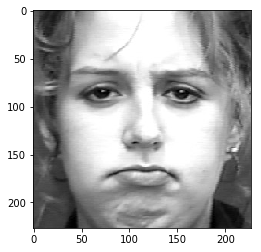

In [72]:
plt.imshow(image_to_show[0],cmap='gray')

In [76]:
#mnew_model.metrics_names
print(np.argmax(mnew_model.predict_proba(test_x1, batch_size = 10)[0]))
print(mnew_model.predict_proba(test_x1, batch_size = 10)[0])
print(np.max(mnew_model.predict_proba(test_x1, batch_size = 10)[0]))

5
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.9601188e-28
 1.0000000e+00]
1.0


4
[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 4.685704e-25
 1.000000e+00]
1.0


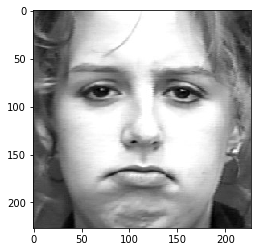

In [81]:
image_to_show=np.moveaxis(np.moveaxis(test_x1[3], 0, 2),0,2)
plt.imshow(image_to_show[0],cmap='gray')
print(np.argmax(mnew_model.predict_proba(test_x1, batch_size = 10)[4]))
print(mnew_model.predict_proba(test_x1, batch_size = 10)[3])
print(np.max(mnew_model.predict_proba(test_x1, batch_size = 10)[3]))

5

In [2]:
proba = predict_prob(0,test_set_x,model)kera
proba1 = predict_prob(1,test_set_x,model)
proba2 = predict_prob(2,test_set_x,model)
proba3 = predict_prob(3,test_set_x,model)
proba4 = predict_prob(4,test_set_x,model)
proba5 = predict_prob(5,test_set_x,model)
proba6 = predict_prob(6,test_set_x,model)
proba7 = predict_prob(7,test_set_x,model)
Out = []
for row in zip(proba,proba1,proba2,proba3,proba4,proba5,proba6,proba7):
	a = numpy.argmax(np.array(row).mean(axis=0))
	Out.append(a)

Out = np.array(Out)
test_set_y = np.array(test_set_y)
c = np.sum(Out == test_set_y)
print("Acc:"+str((float(c)/len(Out))))

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:210: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(48, 48, 1..., padding="valid")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:211: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:212: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(2, 2), data_format="channels_last")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:215: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(1, 1), data_format="channels_last")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:216: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:217: UserWarning: Upd

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 44, 44, 64)        123904    
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 22, 22, 64)        30976     
__________

ValueError: Dimension 0 in both shapes must be equal, but are 44 and 223 for 'Assign_2' (op: 'Assign') with input shapes: [44,44,64], [223,223,64].